In [58]:
# Install required package(s)
pkgs <- c("faraway", "investr")
lib <- installed.packages()[, "Package"]
install.packages(setdiff(pkgs, lib))

In [59]:
# Load Wisconsin breast cancer data set from faraway package
data(wcgs, package = "faraway")

head(wcgs)  # print first few records

,age,height,weight,sdp,dbp,chol,behave,cigs,dibep,chd,typechd,timechd,arcus
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,49,73,150,110,76,225,A2,25,A,no,none,1664,absent
2,42,70,160,154,84,177,A2,20,A,no,none,3071,present
3,42,69,160,110,78,181,B3,0,B,no,none,3071,absent
4,41,68,152,124,78,132,B4,20,B,no,none,3064,absent
5,59,70,150,144,86,255,B3,20,B,yes,infdeath,1885,present
6,44,72,204,150,90,182,B4,0,B,no,none,3102,absent


In [82]:
# Binary regression with logit link
wcgs.logit <- glm(chd ~ . - typechd - timechd - behave, data = wcgs,
                 family = quasibinomial)

In [83]:
summary(wcgs.logit)


Call:
glm(formula = chd ~ . - typechd - timechd - behave, family = quasibinomial, 
    data = wcgs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3568  -0.4350  -0.3115  -0.2204   2.8482  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -12.246031   2.262122  -5.414 6.65e-08 ***
age            0.061569   0.011982   5.138 2.94e-07 ***
height         0.007068   0.032204   0.219  0.82628    
weight         0.008578   0.003757   2.283  0.02250 *  
sdp            0.018312   0.006194   2.957  0.00313 ** 
dbp           -0.001175   0.010523  -0.112  0.91107    
chol           0.010708   0.001479   7.239 5.66e-13 ***
cigs           0.020966   0.004149   5.054 4.58e-07 ***
dibepB        -0.658194   0.141074  -4.666 3.21e-06 ***
arcuspresent   0.210539   0.139057   1.514  0.13011    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.9342892)

    Null devian

In [62]:
# Binary regression with Gaussian CDF/probit link
wcgs.probit <- glm(chd ~ . - typechd - timechd - behave, data = wcgs,
                   family = binomial(link = "probit"))

In [63]:
# Binary regression with cloglog link
wcgs.cloglog <- glm(chd ~ . - typechd - timechd - behave, data = wcgs,
                    family = binomial(link = "cloglog"))

In [64]:
# Binary regression with cauchit link
wcgs.cauchit <- glm(chd ~ . - typechd - timechd - behave, data = wcgs,
                    family = binomial(link = "cauchit"))

In [65]:
summary(wcgs.cauchit)


Call:
glm(formula = chd ~ . - typechd - timechd - behave, family = binomial(link = "cauchit"), 
    data = wcgs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6540  -0.4117  -0.3540  -0.3136   2.5124  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -24.086066   5.381867  -4.475 7.63e-06 ***
age            0.115178   0.028247   4.077 4.55e-05 ***
height         0.053239   0.075906   0.701 0.483062    
weight         0.002803   0.008466   0.331 0.740552    
sdp            0.041702   0.011636   3.584 0.000339 ***
dbp           -0.001380   0.021727  -0.064 0.949342    
chol           0.019798   0.003201   6.185 6.21e-10 ***
cigs           0.042856   0.008711   4.920 8.66e-07 ***
dibepB        -1.319965   0.430059  -3.069 0.002146 ** 
arcuspresent   0.711231   0.310369   2.292 0.021931 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devian

In [66]:
# Compare coefficients
coefs <- cbind(
  "logit" = coef(wcgs.logit),
  "probit" = coef(wcgs.probit),
  "cloglog" = coef(wcgs.cloglog),
  "cauchit" = coef(wcgs.cauchit)
)
round(coefs, digits = 3)

,logit,probit,cloglog,cauchit
(Intercept),-12.246,-6.452,-11.377,-24.086
age,0.062,0.031,0.057,0.115
height,0.007,0.003,0.007,0.053
weight,0.009,0.005,0.007,0.003
sdp,0.018,0.010,0.017,0.042
dbp,-0.001,-0.001,-0.001,-0.001
chol,0.011,0.006,0.010,0.020
cigs,0.021,0.011,0.019,0.043
dibepB,-0.658,-0.341,-0.604,-1.320
arcuspresent,0.211,0.101,0.206,0.711


In [67]:
# Compare fitted values (i.e., predicted probabilities)
preds <- cbind(
  "logit" = fitted(wcgs.logit),
  "probit" = fitted(wcgs.probit),
  "cloglog" = fitted(wcgs.cloglog),
  "cauchit" = fitted(wcgs.cauchit)
)
head(round(preds, digits = 3))

,logit,probit,cloglog,cauchit
1,0.071,0.072,0.072,0.076
2,0.073,0.074,0.075,0.084
3,0.010,0.006,0.011,0.038
4,0.010,0.006,0.012,0.039
5,0.169,0.167,0.168,0.150
6,0.034,0.033,0.035,0.051


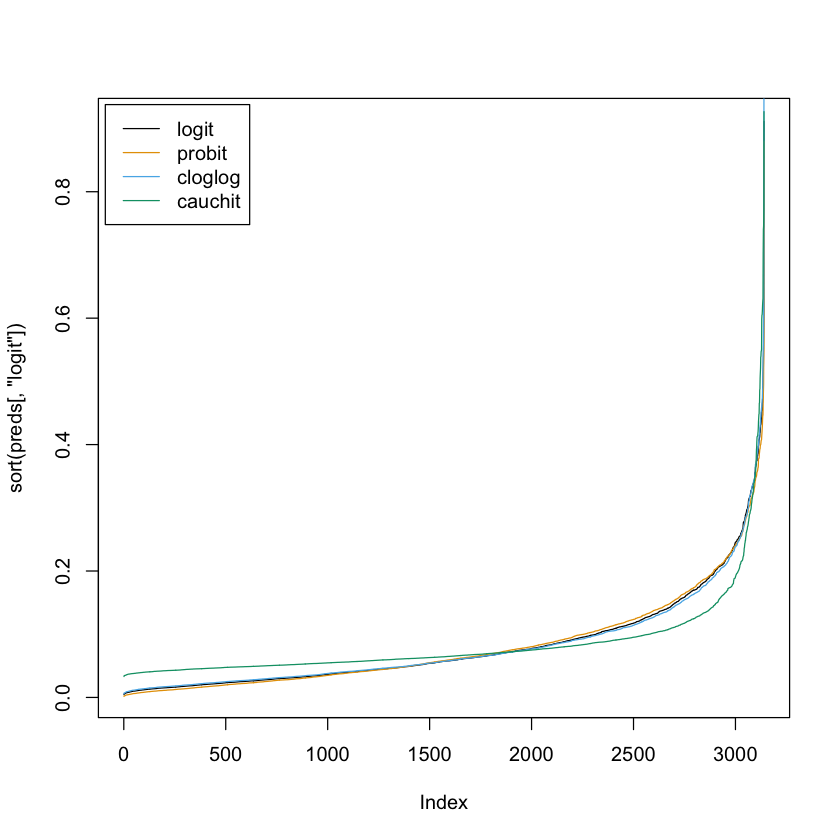

In [68]:
palette("Okabe-Ito")
plot(sort(preds[, "logit"]), type = "l")
lines(sort(preds[, "probit"]), col = 2)
lines(sort(preds[, "cloglog"]), col = 3)
lines(sort(preds[, "cauchit"]), col = 4)
legend("topleft", legend = c("logit", "probit", "cloglog", "cauchit"), 
       col = 1:4, lty = 1, inset = 0.01)
palette("default")

In [69]:
# Compare deviances (similar to comparing SSEs in linear regression)
sapply(list(wcgs.logit, wcgs.probit, wcgs.cloglog, wcgs.cauchit),
       FUN = function(object) deviance(object))

[1] 1569.472 1565.683 1571.995 1615.477

In [ ]:
###############################################################################
#
# Understanding logistic regression with binomial data
#
# (predicting O-ring failure; the Challenger disaster)
#
###############################################################################

In [ ]:
# Read data documentation
?faraway::orings

In [70]:
# Load the oring data
data(orings, package = "faraway")

# Inspect data
head(orings)

,temp,damage
,<dbl>,<dbl>
1,53,5
2,57,1
3,58,1
4,63,1
5,66,0
6,67,0


In [ ]:
# Scatterplot of proportion of damaged O-rings as a fucntion of temperature
plot(damage / 6 ~ temp, data = orings)

In [71]:
# Expand binomial trials into Bernoulli
tmp <- rep(orings$temp, each = 6)
dmg <- sapply(orings$damage, FUN = function(x) rep(c(0, 1), times = c(6 - x, x)))
#head(dmg)
orings2 <- data.frame("temp" = tmp, "damage" = as.vector(dmg))
head(orings2, n = 15)
            
# Fit a logistic regression (LR) model using 0/1 version of the data
orings.lr <- glm(damage ~ temp, data = orings2, 
                 family = binomial(link = "logit"))
coef(orings.lr)

,temp,damage
,<dbl>,<dbl>
1,53,0
2,53,1
3,53,1
4,53,1
5,53,1
6,53,1
7,57,0
8,57,0
9,57,0


(Intercept)        temp 
 11.6629897  -0.2162337

In [76]:
# What is the chance that an O-ring will be damaged at 31F? Give a point 
# estimate as well as a 95% confidence interval.
predict(orings.lr, newdata = data.frame("temp" = 31), type = "response", 
        se = TRUE)


# Better approach for a 95% CI?
pred <- predict(orings.lr, newdata = data.frame("temp" = 31), type = "link", 
                se = TRUE)
plogis(pred$fit + c(-qnorm(0.975), qnorm(0.975)) * pred$se.fit)

$fit
        1 
0.9930342 

$se.fit
         1 
0.01153302 

$residual.scale
[1] 1

[1] 0.8444824 0.9997329

In [ ]:
# What will happen to the chance of damage if the temperature were to drop by 30F?
exp(-30 * coef(orings.lr)[2])

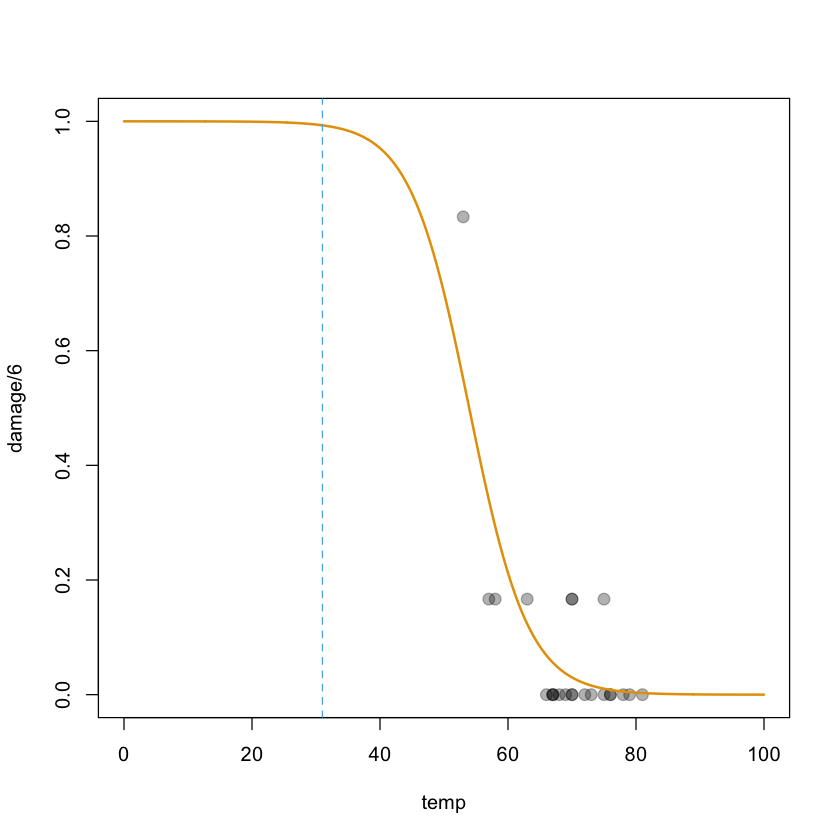

In [78]:
# Is this extrapolating?
palette("Okabe-Ito")
plot(damage / 6 ~ temp, data = orings, pch = 19, cex = 1.3,
     col = adjustcolor(1, alpha.f = 0.3), xlim = c(0, 100), ylim = c(0, 1))
x <- seq(from = 0, to = 100, length = 1000)
y <- predict(orings.lr, newdata = data.frame("temp" = x), type = "response")
lines(x, y, lwd = 2, col = 2)
abline(v = 31, lty = 2, col = 3)
palette("default")

In [ ]:
# More interesting question: at what temperature(s) can we expect the risk/
# probability of damage to exceed 0.8?
#
# This is a problem of inverse estimation, which is the purpose of the investr
# package in R; see https://journal.r-project.org/archive/2014/RJ-2014-009/index.html
#
# To install from CRAN, use
#
# > install.packages("investr")
#
# See ?investr::invest for details and examples
investr::invest(orings.lr, y0 = 0.8, interval = "Wald", lower = 40, upper = 60)

In [77]:
# Equivalent LR model using original binomial data 
orings.lr2 <- glm(cbind(damage, 6 - damage) ~ temp, data = orings,
                  family = binomial(link = "logit"))
coef(orings.lr2)

(Intercept)        temp 
 11.6629897  -0.2162337

In [ ]:
# Print summary of model fit
summary(orings.lr2)

In [ ]:
# Compute residual deviance
r <- residuals(orings.lr2, type = "deviance")
sum(r ^ 2)  # similar to SSE statistic in linear regression

In [ ]:
# Over-dispersion
#
# * Over-dispersion is said to exist when there is more variability than 
#   expected under the response distribution; similar for underdispersion.
#
# * For a correctly specified model, the Pearson chi-square statistic and the 
#   deviance, divided by their degrees of freedom, should be approximately 
#   equal to one. When their values are much larger than one, the assumption 
#   of binomial variability might not be valid and the data are said to exhibit 
#   overdispersion. Underdispersion, which results in the ratios being less 
#   than one, occurs less often in practice.
#
# * Overall performance of the fitted model can be measured by several 
#   different goodness-of-fit tests. Two tests that require replicated data 
#   (multiple observations with the same values for all the predictors) are the 
#   Pearson chi-square goodness-of-fit test and the deviance goodness-of-fit 
#   test (analagous to the multiple linear regression lack-of-fit F-test).
#
# * When fitting a model, there are several problems that can cause the 
#   goodness-of-fit statistics to exceed their degrees of freedom. Among these 
#   are such problems as outliers in the data, using the wrong link function, 
#   omitting important terms from the model, and needing to transform some 
#   predictors. These problems should be eliminated before proceeding to use 
#   the following methods to correct for overdispersion.
#
# * A large difference between the Pearson statistic and the deviance provides 
#   some evidence that the data are too sparse to use either statistic.

In [79]:
# Can use quasi-binomial family to account for over-dispersion
fit.qb <- glm(cbind(damage, 6 - damage) ~ temp, data = orings, family = quasibinomial)
summary(fit.qb)


Call:
glm(formula = cbind(damage, 6 - damage) ~ temp, family = quasibinomial, 
    data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 11.66299    3.81077   3.061  0.00594 **
temp        -0.21623    0.06148  -3.517  0.00205 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 1.336542)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 6


In [80]:
#
# Same as using quasi-binomial family above
#

# Estimate of dispersion parameter; analagous to MSE in linear reg.
(phi <- sum(residuals(orings.lr2, type = "pearson") ^ 2) / orings.lr2$df.residual)

# Print model summary based on estimated dispersion parameter
summary(orings.lr2, dispersion = phi)

[1] 1.336542


Call:
glm(formula = cbind(damage, 6 - damage) ~ temp, family = binomial(link = "logit"), 
    data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.81077   3.061 0.002209 ** 
temp        -0.21623    0.06148  -3.517 0.000436 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1.336542)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


In [ ]:
# How is the residual deviance computed?
deviance(orings.lr2)

# Computing by hand
d <- residuals(orings.lr2, type = "deviance")
sum(d ^ 2)  # analagous to SSE in linear reg.